# Understanding values in 'hist' returned by numpy.hist function when density is set to True and using it to calculate CDF

### Want to go to code directly?

For any reason if you just want to see the main/core code then refer to function core_call_numpy_histogram.

## Use of numpy.hist and cumsum functions


Call to numpy.hist() function is made by, (refer to numpy.hist documentation below)
 - setting density parameter to True.
 - width of all bins is kept equal

numpy.cumsum() is used as a CDF function. https://en.wikipedia.org/wiki/Cumulative_distribution_function

##### Values in 'hist' array returned by numpy.hist() is refered by term  hist_values in below text and code.


### numpy.histogram documentation

https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

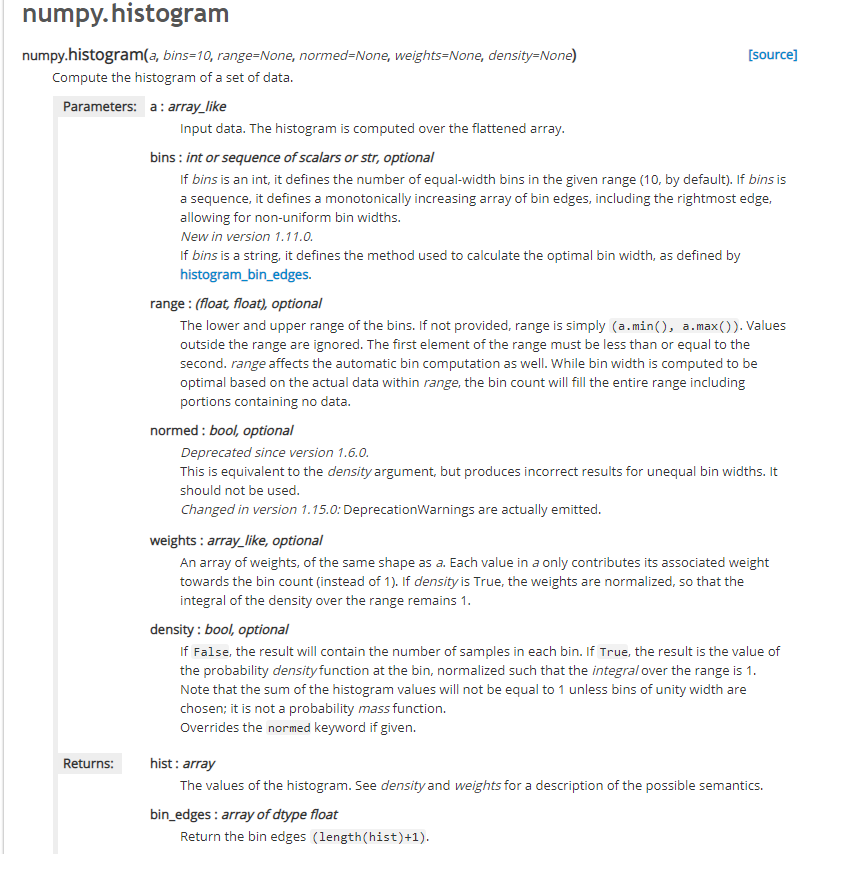

## Some insights and queries after reading density parameter documentation,



#### 1.
As the density parameter is passed as True, it is going to return hist_values of PDF. 

That is as expected.

https://en.wikipedia.org/wiki/Probability_density_function

#### 2.
It says, hist_values are normalized such that the integral over the range is 1.

What is meaning of this? Does this means that sum of hist_values is 1? no right, as documentation further says, sum of hist_values will not be one unless bins of unit width are chosen. 

Case when bins are of unit width is a special case demonstred in Example #1.

So what does it means? and how to use hist_values as input to CDF?


## Inferences made from below code trials are

### 1. The hist_values returned by numpy.hist() function are heights of histogram bars.

    To support this we calculate sum of area of all histogram bars by,
    area = sum (hist_value) * 'width of bins'
    Note: 'width of bins' same for all histogram bars as per documentation of numpy.hist() and parameters we have passed to it.
    
    If this ares is ~1 then what we are thinking has some base because thats what PDF and histogram bars means.
    
    (refer to "Verification #1: area_of_histogram bar" in output of the below code examples.)

    As in all below examples this ares is ~1, what we are thinking looks correct.
    
    This inference is not valid if density paramter to numpy.hist() is not True. 
    In such case "the result will contain the number of samples in each bin." (from numpy.hist() documentation)


### 2. Passing hist_values as input to CDF function will not give output in range (0, 1)

    We expect range of CDF as (0, 1), right? but we wont get it that easily :-)
    
    This is becuase,
    "the sum of all hist_value" is not 1, except (refer to example #1) when 'width of bins'is 1.
    (refer to ""Verification #2: sum(hist_values) = " in output of the below code examples.)

    If hist_value are directly passed to CDF function then output of CDF wont be between (0, 1). 
    You can play with below code and check it. 


### 3. Input to CDF shall be areas of histogram bars

    Multiplying hist_value by 'width of bins' gives area of individual histogram bars. 
    
    The sum of area of all histogram bars is 1. (See #1 above) 
    So if area of histogram bars is given to CDF then output of CDF will be in range (0, 1), thats what we expected in #2 
    and thats what we get. Refer to "Verification #3: sum(input_to_cdf) =" in output of the below code examples.

## Code below,

If you have limited time and want to just see main code then refer to function core_call_numpy_histogram.


### Example #1 is special as 'width of bins' is one

### Rest of the examples are to verify above inferences for different input data.

### In Example #5 histogram is flat at y = 1, nothing much relevent to this discussion but if someone is interested.

### Importing packages and intialization code

In [ ]:
import numpy
import matplotlib.pyplot
import random as random
import scipy.stats

def initialize_setting():
    # float values formating
    float_formatter = "{:.3f}".format
    numpy.set_printoptions(formatter={'float_kind':float_formatter})
    
initialize_setting()

### Call numpy.hist function, show inputs/outputs of it and call CDF function for verification

In [ ]:
def core_call_numpy_histogram(input_data, bins_count = 10):
    bins_range = (numpy.floor(input_data.min()), numpy.ceil(input_data.max()))
    densityFlag = True
    print("Inputs to numpy.histogram()")
    print("              a = ", input_data)
    print("          range = ", bins_range)
    print("        density = ", densityFlag)
    print("     bins_count = ", bins_count)
    print("")
    
    hist_values, bin_edges = numpy.histogram(a = input_data, density=densityFlag, range=bins_range, bins=bins_count)
    
    print("Output of numpy.histogram()")
    print("     hist_values = ", hist_values)
    print("len(hist_values) = ",len(hist_values))
    print("       bin_edges = ", bin_edges)
    print("")

    width_of_each_bin = abs(bins_range[0] - bins_range[1]) / bins_count
    area_of_histogram = sum(hist_values) * width_of_each_bin

    print("Verification #1: area_of_histogram bars = ", area_of_histogram)
    
    print("Verification #2: sum(hist_values) = ",  sum(hist_values), end="\n\n")
    print("")
    
    print("Generating input to CDF, to calculate CDF numpy.cumsum() is used.")
    print("    width_of_each_bin = ", width_of_each_bin)
    print("    multiplying each value in hist_values by width_of_each_bin.")
    input_to_cdf = numpy.copy(hist_values)
    input_to_cdf = input_to_cdf  * width_of_each_bin
    print("")
    
    
    print("Verification #3: sum(input_to_cdf) = ",  sum(input_to_cdf), end="\n\n")
    print("")
    
    print("Inputs to numpy.cumsum()")
    print("              a = ", input_to_cdf)
    print("")
    cdf_values = numpy.cumsum(input_to_cdf)
    print("Output of numpy.cumsum()")
    print("            cdf_values = ", cdf_values)     
    
    return bin_edges, hist_values, cdf_values


### wrapper function to call above function and drawing plots

In [ ]:
def call_numpy_histogram(input_data, bins_count = 10):
    bin_edges, hist_values, cdf_values = core_call_numpy_histogram(input_data, bins_count)
    print("\n Verification #3: CDF plot")
    show_plots(bin_edges, hist_values, cdf_values)
    
def show_plots(bin_edges, hist_values, cdf_values):
    matplotlib.pyplot.grid()
    matplotlib.pyplot.title("Histogram (green), normal dist plot(yellow), CDF(blue)")
    matplotlib.pyplot.xlabel("Data range")
    matplotlib.pyplot.ylabel("Probability")
    matplotlib.pyplot.plot(bin_edges[1:], hist_values, 'g')
    matplotlib.pyplot.plot(bin_edges[1:], cdf_values)
    
def plotNormalDistribution(input_data, mu, sigma):
    pdata = numpy.sort(input_data)
    matplotlib.pyplot.plot(pdata, scipy.stats.norm.pdf(pdata, mu, sigma), 'y')

### Example 0
data is in normal distribution

mu = 10, sigma = 2

In [ ]:
def data_in_normal_distribution_data_range_zero_to_ten():
    matplotlib.pyplot.figure()
    mu, sigma = 10, 2 # mean and standard deviation
    input_data_length = 9999
    data = numpy.random.normal(mu, sigma, input_data_length)

    '''
    As the random number are generated using normal dist, it is very unlikely to have number greater than 9 and
    less than 1.
    If that happens then range input to numpy.histogram() will be like (1, 9)
    If the range input to numpy.histogram() is not (0, 10) then it wont generate unity bins which is 
    must for this demonstration
    '''
    data = numpy.append(data, 9.00001) 
    data = numpy.append(data, 0.00001) 
    call_numpy_histogram(data)

    plotNormalDistribution(data, mu, sigma)

data_in_normal_distribution_data_range_zero_to_ten()

### Example 1
data is in normal distribution

mu = 5, sigma = 1

range (0, 10)

#### Sum of hist_values is 1. This is special case as 'width of bins' is one.

In [ ]:
def data_in_normal_distribution_data_range_zero_to_ten():
    matplotlib.pyplot.figure()
    mu, sigma = 5, 1 # mean and standard deviation
    input_data_length = 9999
    data = numpy.random.normal(mu, sigma, input_data_length)

    '''
    As the random number are generated using normal dist, it is very unlikely to have number greater than 9 and
    less than 1.
    If that happens then range input to numpy.histogram() will be like (1, 9)
    If the range input to numpy.histogram() is not (0, 10) then it wont generate unity bins which is 
    must for this demonstration
    '''
    data = numpy.append(data, 9.00001) 
    data = numpy.append(data, 0.00001) 
    call_numpy_histogram(data)

    plotNormalDistribution(data, mu, sigma)

data_in_normal_distribution_data_range_zero_to_ten()

### Example 2
data is in normal distribution.

mu = 0.5, sigma = 0.05

data range (0.0, 1.0)

In [ ]:
def data_in_normal_distribution_data_range_zero_to_one():
    matplotlib.pyplot.figure()
    mu, sigma = 0.5, 0.05 # mean and standard deviation
    input_data_length = 9999
    data = numpy.random.normal(mu, sigma, input_data_length)

    data = numpy.append(data, .91) 
    data = numpy.append(data, .1) 
    call_numpy_histogram(data)

    plotNormalDistribution(data, mu, sigma)

data_in_normal_distribution_data_range_zero_to_one()

### Example 3
data is in normal distribution

mu = 0.0, sigma = 1

approximate data range (-5, 5)

In [ ]:
def data_in_normal_distribution_mean_zero_and_sigma_one():
    matplotlib.pyplot.figure()
    mu, sigma = 0.0, 1 # mean and standard deviation
    input_data_length = 9999
    data = numpy.random.normal(mu, sigma, input_data_length)
    call_numpy_histogram(data)

    plotNormalDistribution(data, mu, sigma)


data_in_normal_distribution_mean_zero_and_sigma_one()

### Example 4
data is in normal distribution.

mu = -10.0, sigma = 1

approximate  data range (-15.0 to -6.0)

In [ ]:
def data_in_normal_distribution_mean_zero_and_sigma_one():
    matplotlib.pyplot.figure()
    mu, sigma = -10.0, 1 # mean and standard deviation
    input_data_length = 9999
    data = numpy.random.normal(mu, sigma, input_data_length)
    call_numpy_histogram(data)

    plotNormalDistribution(data, mu, sigma)


data_in_normal_distribution_mean_zero_and_sigma_one()

### Example 5
data is in NOT in normal distribution
data range (0.0 to 1.0)

#### In this example histogram line is almost parallel to x axis at y = 1. It can be easily seen that area under histogram is 1.

In [ ]:
def data_range_zero_to_one_non_normal_dist():
    matplotlib.pyplot.figure()
    input_data_length = 999999
    data = numpy.random.random_sample(input_data_length)
    call_numpy_histogram(data, 30)
    
data_range_zero_to_one_non_normal_dist()
print("\n Normal distribution is not shown in plot as the input data is not in normal distribution.")